# Hierarchical Clustering

In this lab, you will see how to use **hierarchical clustering**.

## Imports

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
import seaborn as sns
from tabulate import tabulate

In [3]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import precision_recall_fscore_support, ConfusionMatrixDisplay
from sklearn.metrics.cluster import contingency_matrix

In [4]:
from sknetwork.data import karate_club, load_netset
from sknetwork.embedding import Spectral
from sknetwork.utils import get_degrees
from sknetwork.visualization import svg_graph, svg_dendrogram

## Iris dataset

We start with the Iris dataset.

In [5]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = list(iris.target_names)

In [6]:
df_iris = pd.DataFrame(data= np.c_[X, y],
                       columns= iris['feature_names'] + ['target'])

df_iris['target'] = df_iris['target'].astype(int)

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
print("X shape : ", X.shape)
print("Number of observations : ", X.shape[0])
print("Number of features : ", X.shape[1])
print("Number of classes : ", len(np.unique(y)))

X shape :  (150, 4)
Number of observations :  150
Number of features :  4
Number of classes :  3


In [8]:
for i in range(len(np.unique(y))):
    print("Classe "+str(np.unique(y, return_counts=True)[0][i])+" : "+str(np.unique(y, return_counts=True)[1][i]))

Classe 0 : 50
Classe 1 : 50
Classe 2 : 50


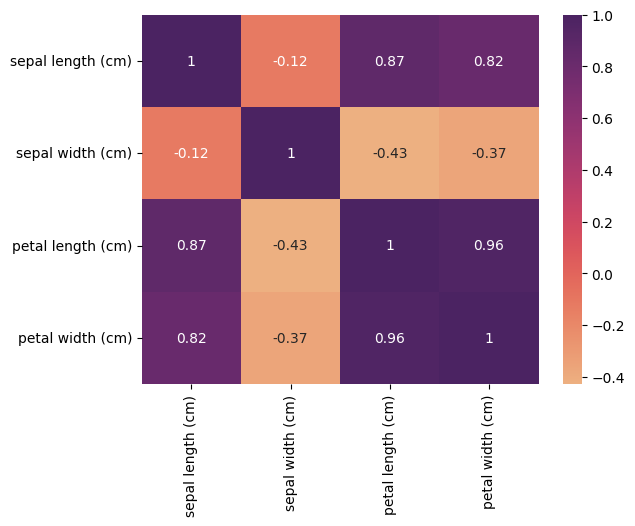

In [9]:
sns.heatmap(df_iris.iloc[:,:4].corr(), annot=True, annot_kws={"size": 10}, cmap='flare')
plt.show()

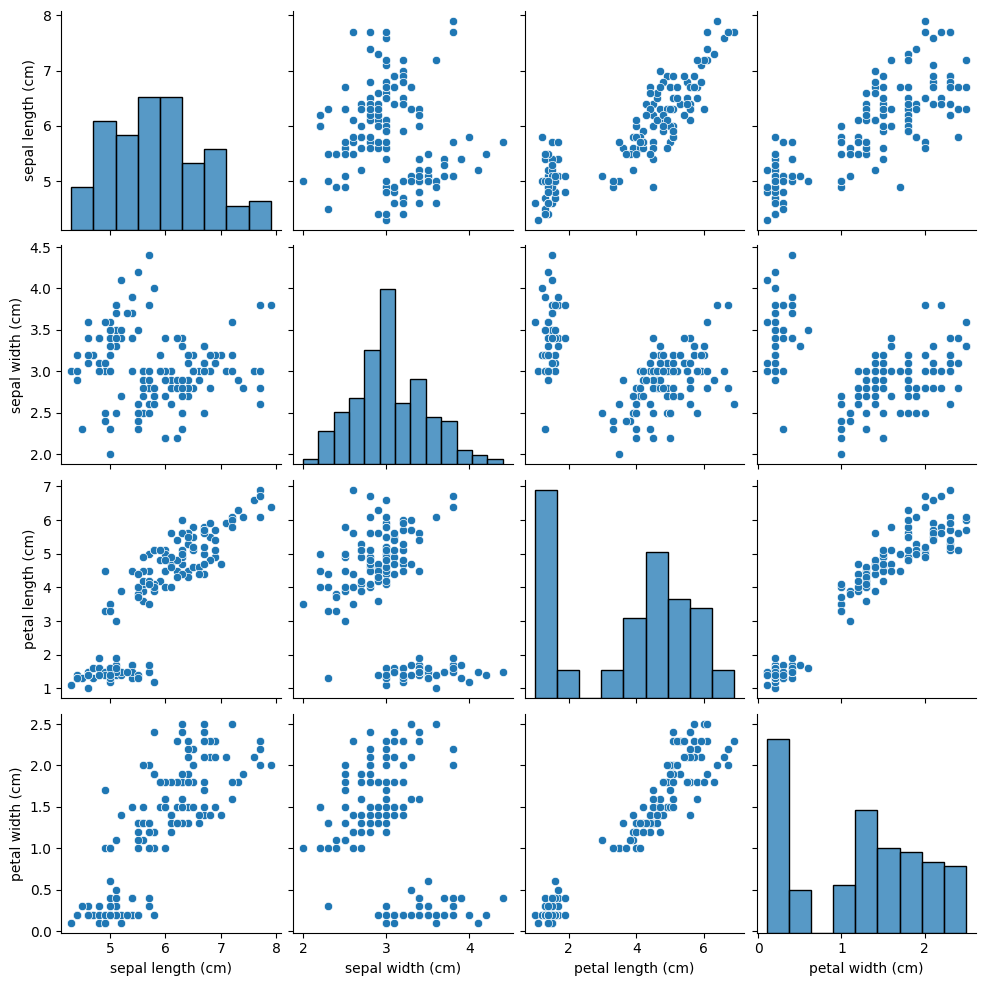

In [10]:
sns.pairplot(df_iris.iloc[:,:4])
plt.show()

In [11]:
def show_data(X, y, features=[0, 1], feature_names=feature_names):
    '''Display the samples in 2D'''
    plt.figure(figsize=(8,6))
    for label in set(y):
        plt.scatter(X[y == label, features[0]], X[y == label, features[1]])
    plt.xlabel(feature_names[features[0]])
    plt.ylabel(feature_names[features[1]])
    plt.show()

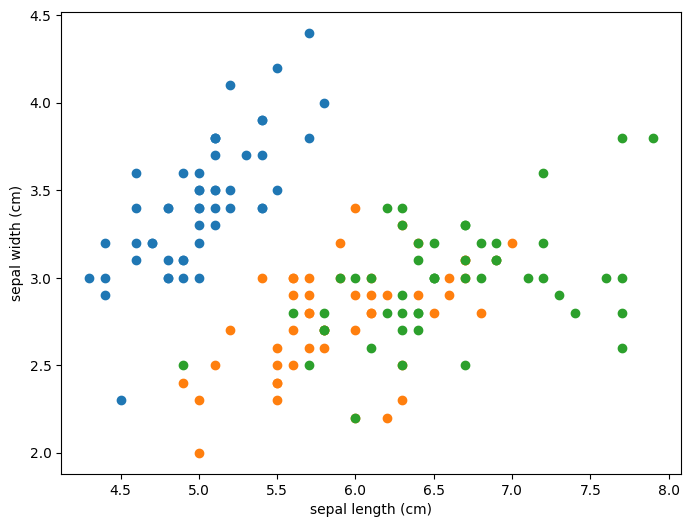

In [12]:
show_data(X, y, [0, 1])

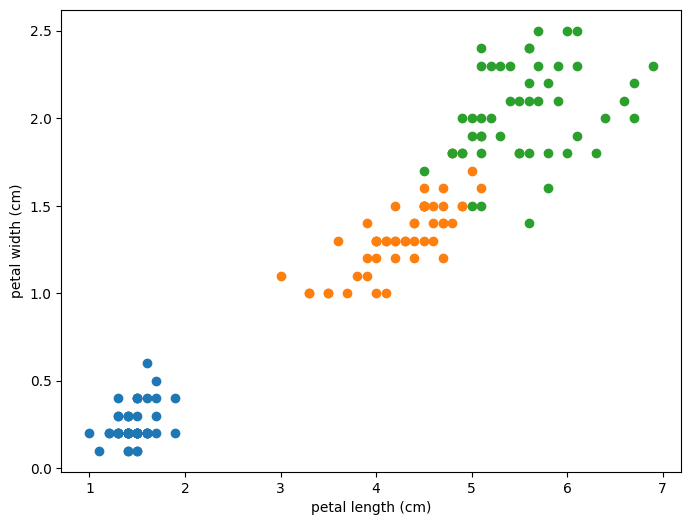

In [13]:
show_data(X, y, [2, 3])

In [14]:
# hierarchical clustering
Z = linkage(X, method='ward')

In [15]:
print("Z shape : ", Z.shape)

Z shape :  (149, 4)


A (n-1) by 4 matrix Z is returned. At the 
i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n+i. A cluster with an index less than 
 corresponds to one of the 
 original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [16]:
Z[50,[0,1,3]].astype(int)

array([164, 171,   5])

For example, at the 50-th iteration, clusters 164 and 171 are combined to form a new cluster 200 (n=150, i=50, which means that n+i=200) of 5 observations. The cluster 164 was formed at the 14-th iteration (because 164-150=14) and the cluster 171 was formed at the 21-th iteration.

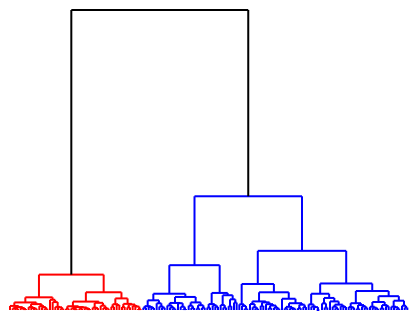

In [17]:
SVG(svg_dendrogram(Z))

We are going to test other methods :

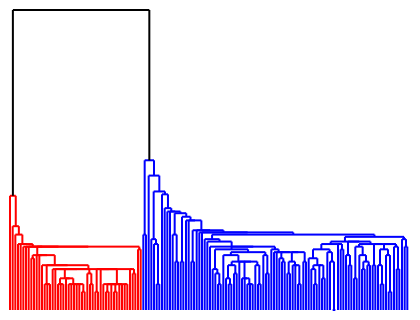

In [18]:
# Method 'single'
SVG(svg_dendrogram(linkage(X, method='single')))

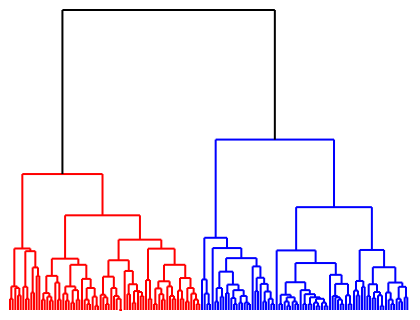

In [19]:
# Method 'complete'
SVG(svg_dendrogram(linkage(X, method='complete')))

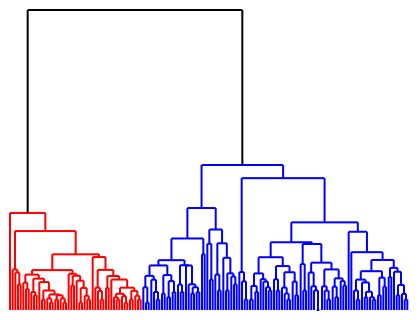

In [20]:
# Method 'average'
SVG(svg_dendrogram(linkage(X, method='average')))

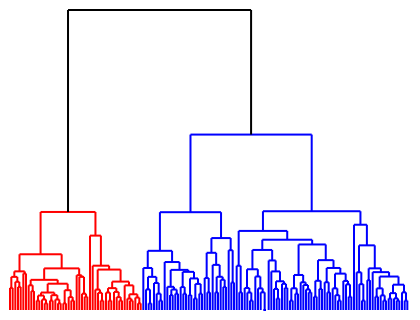

In [21]:
# Method 'weighted'
SVG(svg_dendrogram(linkage(X, method='weighted')))

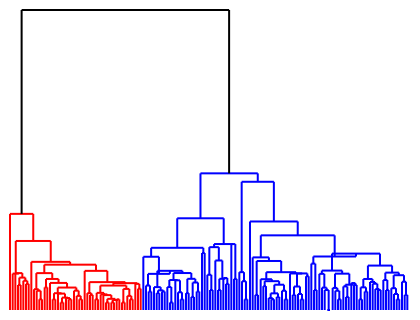

In [22]:
# Method 'centroid'
SVG(svg_dendrogram(linkage(X, method='centroid')))

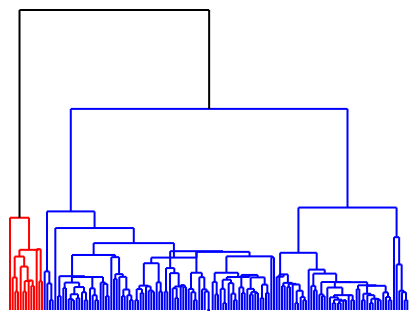

In [23]:
# Method 'median'
SVG(svg_dendrogram(linkage(X, method='median')))

## To do

* What are the two first flowers merged? Compare their features.
* Give the first 2 clusters. Show the contingency matrix and give the ARI / AMI scores.
* Give the first 3 clusters. Show the contingency matrix, give the ARI / AMI scores and compare with K-Means.
* Test other linkages.
* Complete the function ``get_n_clusters`` below and select the 2 best cuts of the dendrogram.

In [24]:
print("The two first flowers merged : ", list(Z[0,[0,1]].astype(int)))

The two first flowers merged :  [np.int64(101), np.int64(142)]


The two first flowers merged are the flowers with indexes 101 and 142.

In [25]:
print("The distance between these two flowers : ", Z[0,2])

The distance between these two flowers :  0.0


In [26]:
df_iris.iloc[list(Z[0,[0,1]].astype(int)) , :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


We can see that these two flowers share the same values for all the features.

<b>Give 2 clusters :</b>

In [27]:
y_pred = cut_tree(Z, n_clusters=2).reshape(-1)

print("Classe 0 : ", np.unique(y_pred, return_counts=True)[1][0])
print("Classe 1 : ", np.unique(y_pred, return_counts=True)[1][1])

Classe 0 :  50
Classe 1 :  100


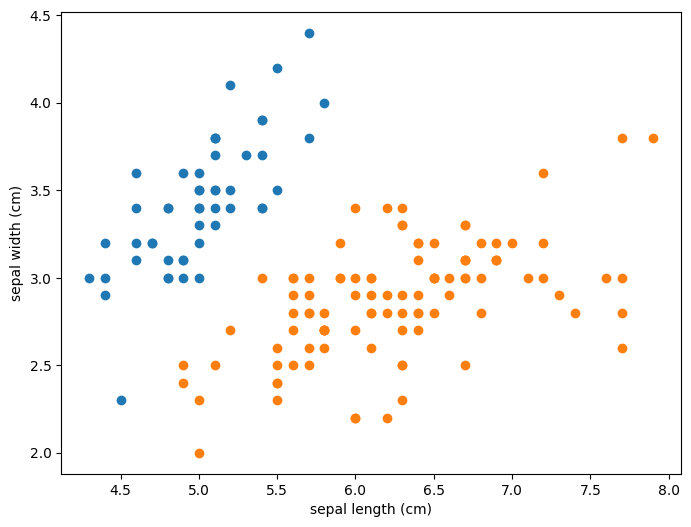

In [28]:
# Scatter plots
show_data(X, y_pred, [0, 1])

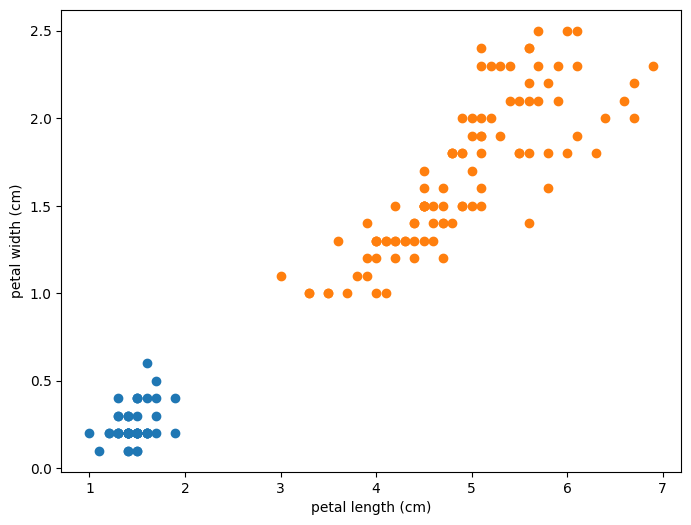

In [29]:
show_data(X, y_pred, [2, 3])

In [30]:
# Precision, Recall, F1-score
metrics = precision_recall_fscore_support(y, y_pred, warn_for=tuple())
list_metrics = ['Precision', 'Recall', 'F1-score', 'Support']

print(tabulate([[list_metrics[i], metrics[i][0], metrics[i][1], metrics[i][2]] for i in range(4)], 
               headers=['Métrique','Classe 0','Classe 1', 'Classe2']))

Métrique      Classe 0    Classe 1    Classe2
----------  ----------  ----------  ---------
Precision            1    0.5               0
Recall               1    1                 0
F1-score             1    0.666667          0
Support             50   50                50


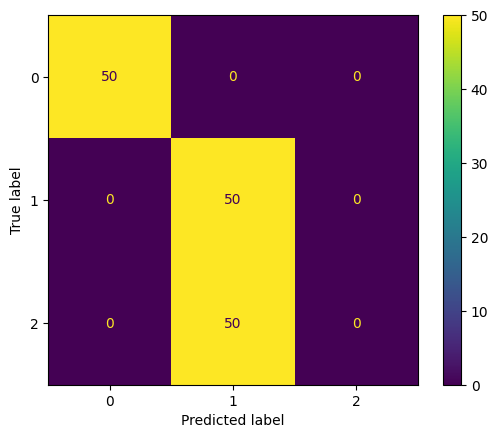

In [31]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()

In [32]:
# Scores
print("Silhouette score : ", silhouette_score(X, y_pred))
print("Davies Bouldin score : ", davies_bouldin_score(X, y_pred))
print("\nARI : ", adjusted_rand_score(y, y_pred))
print("AMI : ", adjusted_mutual_info_score(y, y_pred))

Silhouette score :  0.6867350732769777
Davies Bouldin score :  0.38275284210068616

ARI :  0.5681159420289855
AMI :  0.7315847607219571


<b>Give 3 clusters :</b>

In [33]:
y_pred = cut_tree(Z, n_clusters=3).reshape(-1)

print("Classe 0 : ", np.unique(y_pred, return_counts=True)[1][0])
print("Classe 1 : ", np.unique(y_pred, return_counts=True)[1][1])
print("Classe 2 : ", np.unique(y_pred, return_counts=True)[1][2])

Classe 0 :  50
Classe 1 :  64
Classe 2 :  36


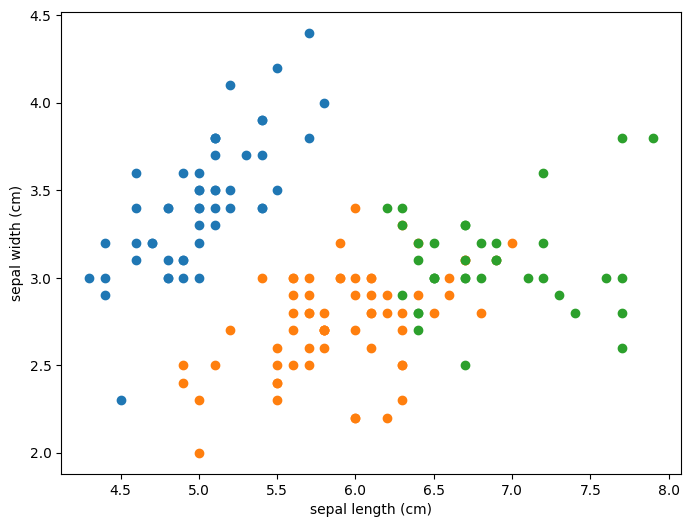

In [34]:
# Scatter plots
show_data(X, y_pred, [0, 1])

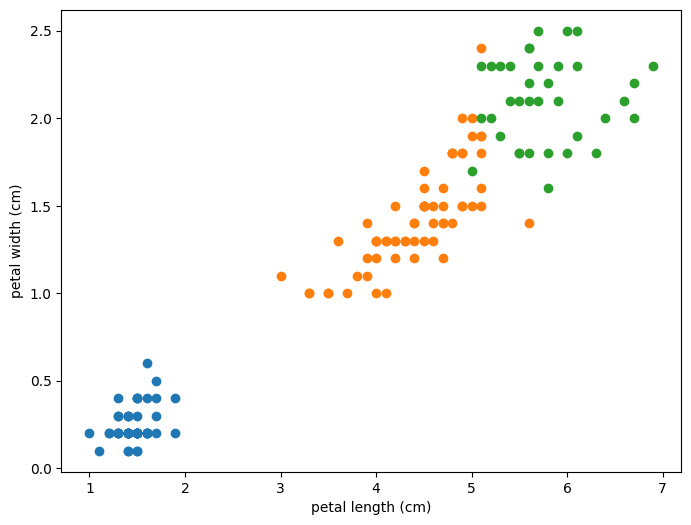

In [35]:
show_data(X, y_pred, [2, 3])

In [36]:
# Precision, Recall, F1-score
metrics = precision_recall_fscore_support(y, y_pred, warn_for=tuple())
list_metrics = ['Precision', 'Recall', 'F1-score', 'Support']

print(tabulate([[list_metrics[i], metrics[i][0], metrics[i][1], metrics[i][2]] for i in range(4)], 
               headers=['Métrique','Classe 0','Classe 1', 'Classe2']))

Métrique      Classe 0    Classe 1    Classe2
----------  ----------  ----------  ---------
Precision            1    0.765625   0.972222
Recall               1    0.98       0.7
F1-score             1    0.859649   0.813953
Support             50   50         50


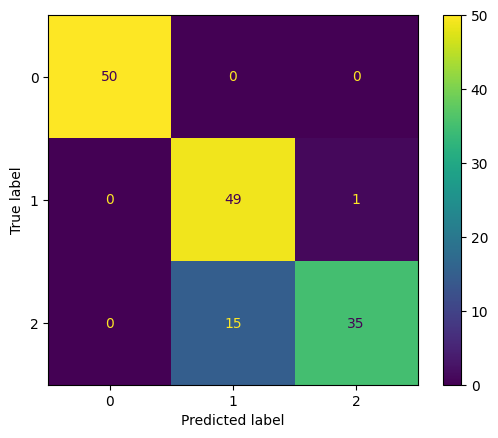

In [37]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()

In [38]:
# Scores
print("Silhouette score : ", silhouette_score(X, y_pred))
print("Davies Bouldin score : ", davies_bouldin_score(X, y_pred))
print("\nARI : ", adjusted_rand_score(y, y_pred))
print("AMI : ", adjusted_mutual_info_score(y, y_pred))

Silhouette score :  0.5543236611296419
Davies Bouldin score :  0.6562564540642021

ARI :  0.7311985567707746
AMI :  0.7671669615713113


Compare with K-means :

In [39]:
km = KMeans(n_clusters=3, n_init=10)
labels = km.fit_predict(X)

In [40]:
# Reorder the labels
cm = contingency_matrix(y, labels)
cm_argmax = cm.argmax(axis=0)
labels = np.array([cm_argmax[i] for i in labels])

In [41]:
# Scores
print("Silhouette score : ", silhouette_score(X, labels))
print("Davies Bouldin score : ", davies_bouldin_score(X, labels))
print("\nARI : ", adjusted_rand_score(y, labels))
print("AMI : ", adjusted_mutual_info_score(y, labels))

Silhouette score :  0.5528190123564095
Davies Bouldin score :  0.6619715465007465

ARI :  0.7302382722834697
AMI :  0.7551191675800484


The hierarchical clustering gives better results on the ARI and the AMI.

Test other linkages with n_clusters = 3 :

In [42]:
print("method = 'single' :")
y_pred = cut_tree(linkage(X, method='single'), n_clusters=3).reshape(-1)
print("ARI : ", adjusted_rand_score(y, y_pred))
print("AMI : ", adjusted_mutual_info_score(y, y_pred))

print("\nmethod = 'complete' :")
y_pred = cut_tree(linkage(X, method='complete'), n_clusters=3).reshape(-1)
print("ARI : ", adjusted_rand_score(y, y_pred))
print("AMI : ", adjusted_mutual_info_score(y, y_pred))

print("\nmethod = 'average' :")
y_pred = cut_tree(linkage(X, method='average'), n_clusters=3).reshape(-1)
print("ARI : ", adjusted_rand_score(y, y_pred))
print("AMI : ", adjusted_mutual_info_score(y, y_pred))

print("\nmethod = 'weighted' :")
y_pred = cut_tree(linkage(X, method='weighted'), n_clusters=3).reshape(-1)
print("ARI : ", adjusted_rand_score(y, y_pred))
print("AMI : ", adjusted_mutual_info_score(y, y_pred))

print("\nmethod = 'centroid' :")
y_pred = cut_tree(linkage(X, method='centroid'), n_clusters=3).reshape(-1)
print("ARI : ", adjusted_rand_score(y, y_pred))
print("AMI : ", adjusted_mutual_info_score(y, y_pred))

print("\nmethod = 'median' :")
y_pred = cut_tree(linkage(X, method='median'), n_clusters=3).reshape(-1)
print("ARI : ", adjusted_rand_score(y, y_pred))
print("AMI : ", adjusted_mutual_info_score(y, y_pred))

method = 'single' :
ARI :  0.5637510205230709
AMI :  0.7125764811325073

method = 'complete' :
ARI :  0.6422512518362898
AMI :  0.718464137199478

method = 'average' :
ARI :  0.7591987071071522
AMI :  0.8032287370935434

method = 'weighted' :
ARI :  0.7455038681804481
AMI :  0.7954205025674187

method = 'centroid' :
ARI :  0.7591987071071522
AMI :  0.8032287370935434

method = 'median' :
ARI :  0.5681159420289855
AMI :  0.7315847607219571


'centroid', 'average' and 'weighted' are the three best methods.

In [43]:
def get_n_clusters(Z, n_max=10):
    '''Get numbers of clusters in decreasing order of height gaps. 
    
    Parameters
    ----------
    Z : np.ndarray
        Dendrogram
    n_max : int
        Maximum number of clusters
    Returns
    -------
    n_clusters : np.ndarray
        Numbers of clusters.
    '''
    heights = Z[:, 2]
    gaps = heights[1:] - heights[:-1]
    n_clusters = len(heights) - np.argsort(-gaps)
    n_clusters = n_clusters[n_clusters <= n_max]
    return n_clusters

In [44]:
get_n_clusters(Z, n_max=15)

array([ 2,  3,  4,  5,  6,  8, 14,  9, 15, 12, 11,  7, 10, 13])

## Karate Club

We now consider the [Karate Club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) graph. The Ward method is applied to the embedding of the graph by [spectral analysis](https://scikit-network.readthedocs.io/en/latest/reference/embedding.html).

<img src='https://upload.wikimedia.org/wikipedia/en/thumb/8/87/Zachary_karate_club_social_network.png/1920px-Zachary_karate_club_social_network.png' width=600 />

In [45]:
graph = karate_club(True)

In [46]:
adjacency = graph.adjacency
labels = graph.labels
position = graph.position

In [47]:
print("Adjacency matrix shape: ", adjacency.shape)
print("Number of labels: ", len(np.unique(labels)))
print("Number of nodes : ", adjacency.shape[0])
print("Number of edges : ", adjacency.nnz // 2)

Adjacency matrix shape:  (34, 34)
Number of labels:  2
Number of nodes :  34
Number of edges :  78


In [48]:
adjacency.toarray()*1

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]], shape=(34, 34))

The density of a undirected graph G is :

$$ d = \frac{2m}{n.(n-1)} $$

where n is the number of nodes and m is the number of edges in G.

In [49]:
n = adjacency.shape[0]
m = adjacency.nnz

density = 2*m / (n*(n-1))

print("Density of the graph: ", density)

Density of the graph:  0.27807486631016043


In [50]:
pd.DataFrame(data={'Vertice': list(range(1,adjacency.shape[0]+1)), 
                   'Degree': np.sum(adjacency.toarray()*1, axis=0)}).set_index(['Vertice', 'Degree'])

,
Vertice,Degree
1,16
2,9
3,10
4,6
5,3
6,4
7,4
8,4
9,5


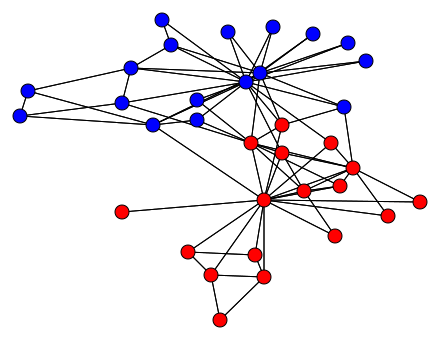

In [51]:
SVG(svg_graph(adjacency, position, labels=labels))

## To do

* Apply hierarchical clustering to the spectral embedding in dimension 3.
* Display the dendrogram.
* Display the best clustering.
* Compute the ARI / AMI scores.
* Compare with k-means (with the same number of clusters).

In [52]:
spectral = Spectral(n_components=3)

In [53]:
X = spectral.fit_transform(adjacency)

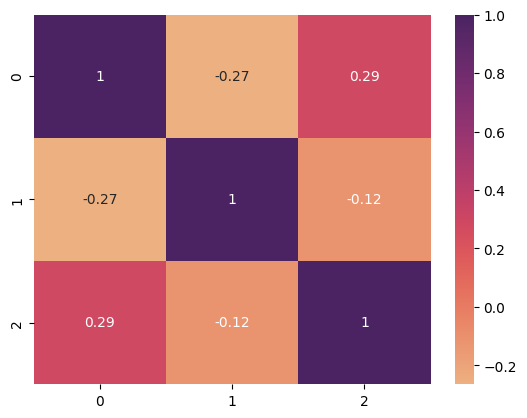

In [54]:
# Correlation Matrix
sns.heatmap(np.corrcoef(X.T), annot=True, annot_kws={"size": 10}, cmap='flare')
plt.show()

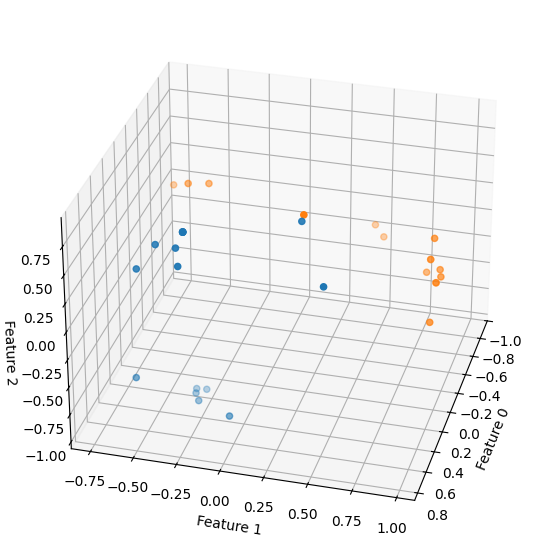

In [55]:
# 3D scatter plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[labels == 0, 0], X[labels == 0, 1], X[labels == 0, 2])
ax.scatter3D(X[labels == 1, 0], X[labels == 1, 1], X[labels == 1, 2])
ax.view_init(30, 15)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
plt.show()

In [56]:
Z = linkage(X, method='ward')

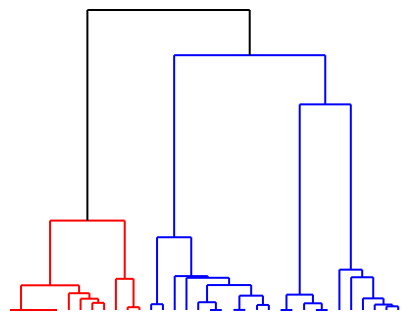

In [57]:
SVG(svg_dendrogram(Z))

In [58]:
get_n_clusters(Z, n_max=8)

array([4, 3, 2, 6, 5, 7, 8])

We can see that the optimal number of clusters is equal to 4.

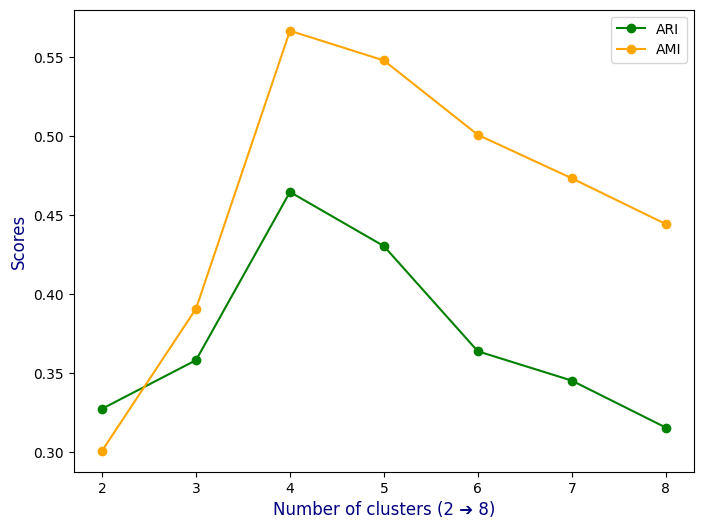

In [59]:
# Select the optimal number of clusters : ARI, AMI
ARI = []
AMI = []

for i in range(2,9):
    predictions = cut_tree(Z, n_clusters=i).reshape(-1)
    ARI.append(adjusted_rand_score(labels, predictions))
    AMI.append(adjusted_mutual_info_score(labels, predictions))
    
fig = plt.figure(figsize=(8,6))

plt.plot([i for i in range(2, 9)], ARI, color='green', marker="o", label='ARI')
plt.plot([i for i in range(2, 9)], AMI, color='orange', marker="o", label='AMI')

plt.xlabel("Number of clusters (2 ➔ 8)", color='navy', fontsize=12)
plt.ylabel("Scores", color='navy', fontsize=12)

plt.xticks(list(range(2, 9)))

plt.legend()

plt.show()

Again, the optimal number of clusters is equal to 4.

Let's compare with K-means :

In [60]:
km = KMeans(n_clusters=4, n_init=10)

print("Hierarchical clustering :")
print("ARI = ", adjusted_rand_score(labels, cut_tree(Z, n_clusters=4).reshape(-1)))
print("AMI = ", adjusted_mutual_info_score(labels, cut_tree(Z, n_clusters=4).reshape(-1)))

print("\nK-means :")
print("ARI = ", adjusted_rand_score(labels, km.fit_predict(X)))
print("AMI = ", adjusted_mutual_info_score(labels, km.fit_predict(X)))

Hierarchical clustering :
ARI =  0.46459109844332386
AMI =  0.566665878069787

K-means :
ARI =  0.46459109844332386
AMI =  0.5666658780697867


We obtained the same scores in both methods.

## Wikipedia

Finally, we consider a small subset of Wikipedia called [Wikipedia for Schools](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools). Each article is encoded by the words used in the summary of this article.

In [61]:
dataset = load_netset('wikischools')

Parsing files...
Done.


In [62]:
adjacency = dataset.adjacency
features = dataset.biadjacency
names = dataset.names
words = dataset.names_col
y = dataset.labels
names_labels = dataset.names_labels

In [63]:
print("Adjacency matrix shape: ", adjacency.shape)
print("Biadjacency matrix shape: ", features.shape)
print("Number of labels: ", len(names_labels))
print("Number of nodes: ", adjacency.shape[0])
print("Number of links: ", adjacency.nnz)
print("Number of features per node : ", features.shape[1])

Adjacency matrix shape:  (4403, 4403)
Biadjacency matrix shape:  (4403, 20527)
Number of labels:  16
Number of nodes:  4403
Number of links:  112834
Number of features per node :  20527


In [64]:
adjacency.toarray()*1

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4403, 4403))

In [65]:
features.toarray()*1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4403, 20527))

In [66]:
i = 100
names[i]

np.str_('United Nations')

In [67]:
# label
names_labels[y[i]]

np.str_('Politics')

In [68]:
# words
words[features[i].indices]

array(['memori', 'trust', 'held', 'sinc', 'wide', 'statu', 'politician',
       'met', 'hagu', 'princip', 'prize', 'new', 'assembl', 'aim',
       'draft', 'member', 'effect', 'main', 'april', 'financ',
       'peacekeep', 'import', 'voluntari', 'gain', 'council', 'social',
       'court', 'antónio', 'nairobi', 'coloni', 'maintain', 'deliv',
       'achiev', 'complex', 'relat', 'world', 'contribut', 'union',
       'octob', 'monitor', 'justic', 'centr', 'far', 'decolon', 'earli',
       'confer', 'former', 'aid', 'peac', 'spend', 'sustain', 'power',
       'leagu', 'primarili', 'geneva', 'opera', 'significantli', 'econom',
       'comment', 'diplomat', 'role', 'alli', 'lightli', 'san', 'budget',
       'forc', 'francisco', 'agenc', 'undertak', 'membership',
       'headquart', 'particip', 'militari', 'decad', 'prevent', 'task',
       'complic', 'januari', 'arm', 'six', 'charter', 'troop', 'ii',
       'adopt', 'among', 'intern', 'observ', 'oper', 'bias', 'develop',
       'respect', '

In [69]:
# number of incoming links
in_degrees = get_degrees(adjacency, transpose=True)
in_degrees[i]

np.int32(318)

In [70]:
import networkx as nx

G = nx.from_numpy_array(adjacency, create_using=nx.DiGraph())

The density of a directed graph is :

$$ d = \frac{m}{n.(n-1)} $$

where n is the number of nodes and m is the number of edges in G.

In [71]:
print("Density of the graph: ", nx.density(G))

Density of the graph:  0.005821585237358816


In [72]:
# We can also compute the degree of each node 
outdeg = G.out_degree()
indeg = G.in_degree()
deg = G.degree()

In [73]:
df_out_degree = pd.DataFrame.from_dict(dict(outdeg), orient='index')
df_out_degree.reset_index(inplace=True)
df_out_degree.columns = ('node', 'out-degree')
df_out_degree = df_out_degree.sort_values('out-degree', ascending=False).reset_index(drop=True)
df_out_degree['name'] = df_out_degree['node'].apply(lambda x: names[x])
df_out_degree['label'] = df_out_degree['node'].apply(lambda x: names_labels[y[x]])
df_out_degree = df_out_degree[['node'] + ['name'] + ['label'] + ['out-degree']]
df_out_degree.head()

,node,name,label,out-degree
0,101,United States,Geography,288
1,3477,Driving on the left or right,Design and Technology,251
2,1023,List of countries,Geography,240
3,2544,List of circulating currencies,Business,232
4,1098,List of sovereign states,Geography,214


In [74]:
df_in_degree = pd.DataFrame.from_dict(dict(indeg), orient='index')
df_in_degree.reset_index(inplace=True)
df_in_degree.columns = ('node', 'in-degree')
df_in_degree = df_in_degree.sort_values('in-degree', ascending=False).reset_index(drop=True)
df_in_degree['name'] = df_in_degree['node'].apply(lambda x: names[x])
df_in_degree['label'] = df_in_degree['node'].apply(lambda x: names_labels[y[x]])
df_in_degree = df_in_degree[['node'] + ['name'] + ['label'] + ['in-degree']]
df_in_degree.head()

,node,name,label,in-degree
0,101,United States,Geography,1499
1,30,United Kingdom,Geography,939
2,38,France,Geography,929
3,180,Europe,Geography,897
4,31,World War II,History,727


In [75]:
df_degree = pd.DataFrame.from_dict(dict(deg), orient='index')
df_degree.reset_index(inplace=True)
df_degree.columns = ('node', 'degree')
df_degree = df_degree.sort_values('degree', ascending=False).reset_index(drop=True)
df_degree['name'] = df_degree['node'].apply(lambda x: names[x])
df_degree['label'] = df_degree['node'].apply(lambda x: names_labels[y[x]])
df_degree = df_degree[['node'] + ['name'] + ['label'] + ['degree']]
df_degree.head()

,node,name,label,degree
0,101,United States,Geography,1787
1,30,United Kingdom,Geography,1101
2,180,Europe,Geography,1052
3,38,France,Geography,1014
4,60,England,Geography,893


In [76]:
print("Average out-degree = ", sum(dict(outdeg).values()) / G.number_of_nodes())
print("Average in-degree = ", sum(dict(indeg).values()) / G.number_of_nodes())
print("Average degree = ", sum(dict(deg).values()) / G.number_of_nodes())

Average out-degree =  25.626618214853508
Average in-degree =  25.626618214853508
Average degree =  51.253236429707016


## To do

* Apply hierarchical clustering to the spectral embedding in dimension 20.
* Select the best clustering and compare with the ground-truth in terms of ARI / AMI.
* Select the clustering with 20 clusters and compare with the ground-truth in terms of ARI / AMI.<br> List the top 5 articles of each cluster (in terms of number of incoming links).

In [77]:
spectral = Spectral(n_components=20)

In [78]:
X = spectral.fit_transform(features)

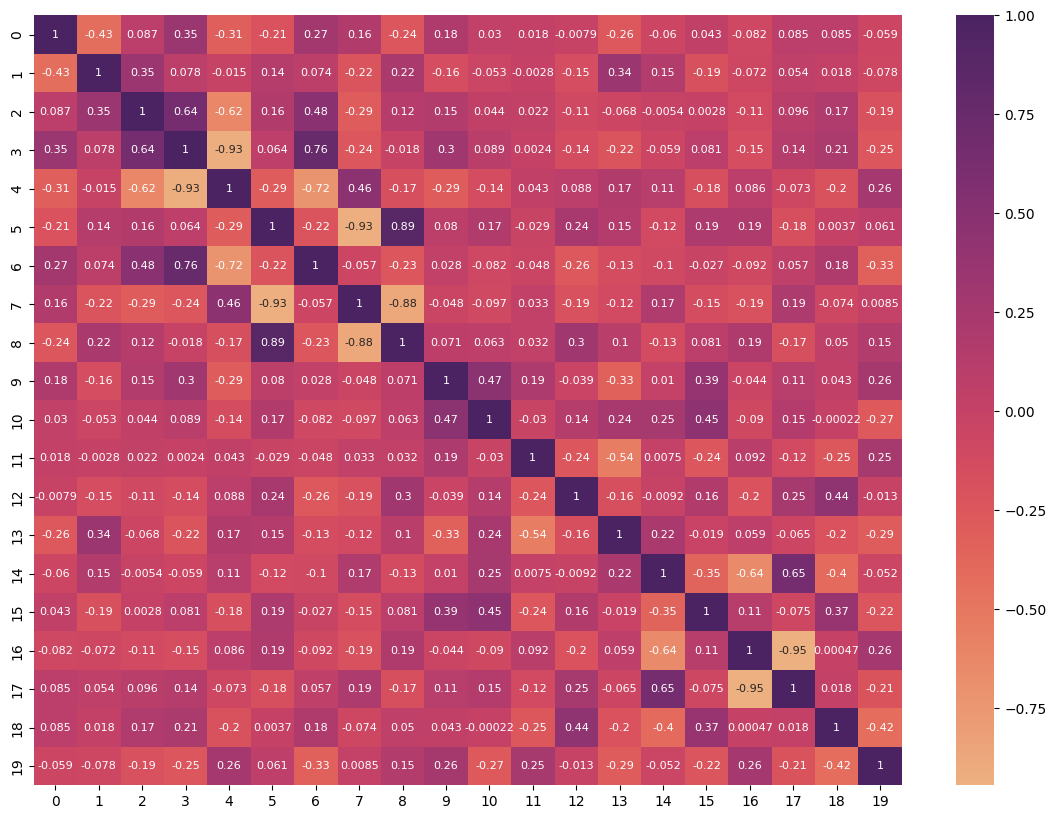

In [79]:
# Correlation Matrix
plt.figure(figsize=(14,10))
sns.heatmap(np.corrcoef(X.T), annot=True, annot_kws={"size": 8}, cmap='flare')
plt.show()

In [80]:
Z = linkage(X, method='ward')

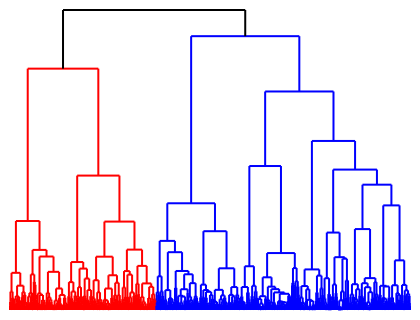

In [81]:
SVG(svg_dendrogram(Z))

In [82]:
get_n_clusters(Z, n_max=20)

array([ 5,  3,  2,  6,  4, 10, 12,  9, 18, 17, 14,  8,  7, 20, 15, 11, 16,
       13, 19])

We can say that the optimal number of clusters is equal to 5.

In [83]:
print("ARI = ", adjusted_rand_score(y, cut_tree(Z, n_clusters=5).reshape(-1)))
print("AMI = ", adjusted_mutual_info_score(y, cut_tree(Z, n_clusters=5).reshape(-1)))

ARI =  0.3519679758463842
AMI =  0.4372736266164605


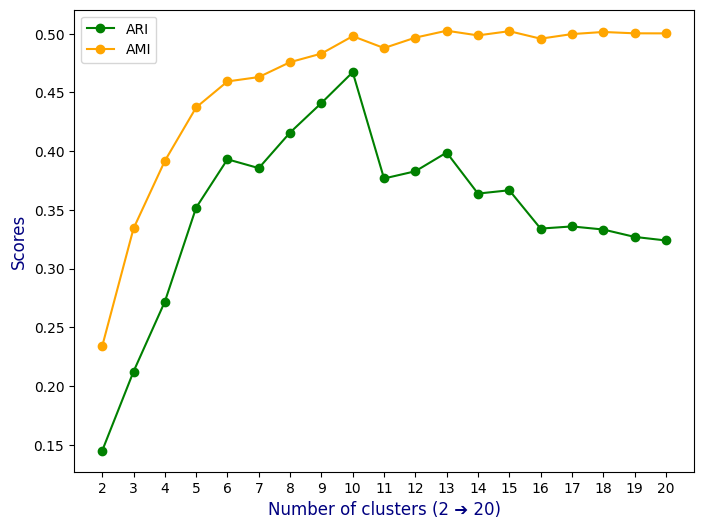

In [84]:
# Select the optimal number of clusters : ARI, AMI
ARI = []
AMI = []

for i in range(2,21):
    predictions = cut_tree(Z, n_clusters=i).reshape(-1)
    ARI.append(adjusted_rand_score(y, predictions))
    AMI.append(adjusted_mutual_info_score(y, predictions))
    
fig = plt.figure(figsize=(8,6))

plt.plot([i for i in range(2, 21)], ARI, color='green', marker="o", label='ARI')
plt.plot([i for i in range(2, 21)], AMI, color='orange', marker="o", label='AMI')

plt.xlabel("Number of clusters (2 ➔ 20)", color='navy', fontsize=12)
plt.ylabel("Scores", color='navy', fontsize=12)

plt.xticks(list(range(2, 21)))

plt.legend()

plt.show()

In [85]:
# Number of clusters in decreasing ARI
list(np.argsort(-np.array(ARI))+2)

[np.int64(10),
 np.int64(9),
 np.int64(8),
 np.int64(13),
 np.int64(6),
 np.int64(7),
 np.int64(12),
 np.int64(11),
 np.int64(15),
 np.int64(14),
 np.int64(5),
 np.int64(17),
 np.int64(16),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(4),
 np.int64(3),
 np.int64(2)]

In [86]:
# Number of clusters in decreasing AMI
list(np.argsort(-np.array(AMI))+2)

[np.int64(13),
 np.int64(15),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(17),
 np.int64(14),
 np.int64(10),
 np.int64(12),
 np.int64(16),
 np.int64(11),
 np.int64(9),
 np.int64(8),
 np.int64(7),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(3),
 np.int64(2)]

With 20 clusters :

In [87]:
print("ARI = ", adjusted_rand_score(y, cut_tree(Z, n_clusters=20).reshape(-1)))
print("AMI = ", adjusted_mutual_info_score(y, cut_tree(Z, n_clusters=20).reshape(-1)))

ARI =  0.32399641398562246
AMI =  0.5003366430705335


Compare with K-means :

In [88]:
km = KMeans(n_clusters=20, n_init=10)
print("ARI = ", adjusted_rand_score(y, km.fit_predict(X)))
print("AMI = ", adjusted_mutual_info_score(y, km.fit_predict(X)))

ARI =  0.29179855407995287
AMI =  0.49022793555814964


List the top 5 articles of each cluster (in terms of number of incoming links) :

In [89]:
df_in_degree = pd.DataFrame.from_dict(dict(indeg), orient='index')
df_in_degree.reset_index(inplace=True)
df_in_degree.columns = ('node', 'in-degree')
df_in_degree = df_in_degree.sort_values('in-degree', ascending=False).reset_index(drop=True)
df_in_degree['name'] = df_in_degree['node'].apply(lambda x: names[x])
df_in_degree['cluster'] = cut_tree(Z, n_clusters=20).reshape(-1)
df_in_degree = df_in_degree[['node'] + ['name'] + ['cluster'] + ['in-degree']]
df_in_degree = df_in_degree.groupby('cluster').head(5)
df_in_degree = df_in_degree.sort_values(['cluster','in-degree'], ascending=[True, False])
df_in_degree = df_in_degree.set_index(['cluster','node'])

df_in_degree

name  in-degree
cluster node                               
0       101        United States       1499
        30        United Kingdom        939
        38                France        929
        180               Europe        897
        54      English language        569
...                          ...        ...
19      828              Poverty         63
        355            Telescope         56
        439          Electronics         48
        882   Augustine of Hippo         39
        1021            Flanders         37

[100 rows x 2 columns]